In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime

In [154]:
# Convert all CSV files to DataFrame

df1 = pd.read_csv("Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
df2 = pd.read_csv("Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df3 = pd.read_csv("Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df4 = pd.read_csv("Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df5 = pd.read_csv("Resale flat prices based on registration date from Jan-2017 onwards.csv")

In [ ]:
#df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype("int")
df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0


In [156]:
df_main = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [157]:
df_main.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [158]:
df_main.shape

(942276, 11)

In [159]:
df_main[['year', 'month']] = df_main['month'].str.split('-', expand=True)
df_main['year'] = df_main['year'].astype(int)
df_main['month'] = df_main['month'].astype(int)

In [160]:
df_main.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990


In [161]:
df_main['remaining_lease'] = df_main['remaining_lease'].fillna(99-(df_main['year']-df_main['lease_commence_date']))

In [162]:
#split the storey range
df_main[['storey_start','storey_end']]=df_main['storey_range'].str.split('TO',expand=True)
df_main['storey_start'] = df_main['storey_start'].astype(int)
df_main['storey_end'] = df_main['storey_end'].astype(int)

df_main.drop(columns='storey_range',inplace=True)

In [163]:
df_main['block'].dtype

dtype('O')

In [164]:
df_main['block'] = df_main['block'].astype(str).str.extract(r'(\d+)', expand=False).astype(int)

In [165]:
df_main['block'].dtype

dtype('int64')

In [166]:
df_main[['remaining_lease', 'resale_price', 'floor_area_sqm']] = df_main[['remaining_lease', 'resale_price', 'floor_area_sqm']].astype(int)

In [167]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942276 entries, 0 to 942275
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   month                942276 non-null  int64 
 1   town                 942276 non-null  object
 2   flat_type            942276 non-null  object
 3   block                942276 non-null  int64 
 4   street_name          942276 non-null  object
 5   floor_area_sqm       942276 non-null  int64 
 6   flat_model           942276 non-null  object
 7   lease_commence_date  942276 non-null  int64 
 8   resale_price         942276 non-null  int64 
 9   remaining_lease      942276 non-null  int64 
 10  year                 942276 non-null  int64 
 11  storey_start         942276 non-null  int64 
 12  storey_end           942276 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 93.5+ MB


In [168]:
df_main['flat_type'].value_counts()

flat_type
4 ROOM              358873
3 ROOM              299657
5 ROOM              198994
EXECUTIVE            70634
2 ROOM               12262
1 ROOM                1311
MULTI GENERATION       279
MULTI-GENERATION       266
Name: count, dtype: int64

In [169]:
df_main['flat_type'] = df_main['flat_type'].replace('MULTI GENERATION', 'MULTI-GENERATION')

In [170]:
df_main['flat_type'].value_counts()

flat_type
4 ROOM              358873
3 ROOM              299657
5 ROOM              198994
EXECUTIVE            70634
2 ROOM               12262
1 ROOM                1311
MULTI-GENERATION       545
Name: count, dtype: int64

In [171]:
df_main['town'].value_counts()

town
TAMPINES           81006
YISHUN             71050
JURONG WEST        67715
BEDOK              67355
WOODLANDS          66650
ANG MO KIO         52685
HOUGANG            51511
BUKIT BATOK        45353
CHOA CHU KANG      39016
BUKIT MERAH        34915
SENGKANG           33683
PASIR RIS          33585
TOA PAYOH          31993
QUEENSTOWN         29167
GEYLANG            28576
CLEMENTI           28331
BUKIT PANJANG      28172
KALLANG/WHAMPOA    27726
JURONG EAST        25085
SERANGOON          23063
PUNGGOL            21777
BISHAN             21486
SEMBAWANG          14398
MARINE PARADE       8119
CENTRAL AREA        7246
BUKIT TIMAH         2549
LIM CHU KANG          64
Name: count, dtype: int64

In [172]:
df_main['flat_model'].value_counts()

flat_model
Model A                   200642
Improved                  171818
New Generation            111829
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          48405
Simplified                 34869
Apartment                  26067
Standard                   25525
SIMPLIFIED                 23258
Maisonette                 17828
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10306
APARTMENT                   9901
DBSS                        3479
Adjoined flat               1274
Model A-Maisonette          1123
MODEL A-MAISONETTE           982
Type S1                      456
Terrace                      455
MULTI GENERATION             279
Multi Generation             266
TERRACE                      247
Type S2                      227
2-room                       179
Premium Apartment Loft       114
Premium Maisonette            87
Improved-Maisonette           84

In [173]:
# Standardize case and remove extra spaces
df_main['flat_model'] = df_main['flat_model'].str.upper().str.strip()

# Merge variations of model names into a single format
df_main['flat_model'] = df_main['flat_model'].replace({
    'NEW GENERATION': 'NEW GENERATION',
    'Model A': 'MODEL A',
    'IMPROVED': 'IMPROVED',
    'SIMPLIFIED': 'SIMPLIFIED',
    'STANDARD': 'STANDARD',
    'MAISONETTE': 'MAISONETTE',
    'MODEL A-MAISONETTE': 'MODEL A-MAISONETTE',
    'MULTI GENERATION': 'MULTI-GENERATION',
    'MULTI GENERATION': 'MULTI-GENERATION',
    'TERRACE': 'TERRACE',
    'APARTMENT': 'APARTMENT',
    'PREMIUM APARTMENT': 'PREMIUM APARTMENT',
    '2-ROOM': '2-ROOM',
    'Type S1': 'TYPE S1',
    'Type S2': 'TYPE S2',
    'MODEL A2': 'MODEL A2',
    'MAISONETTE': 'MAISONETTE',
    'PREMIUM APARTMENT LOFT': 'PREMIUM APARTMENT LOFT'
})

In [174]:
df_main['flat_model'].value_counts()

flat_model
MODEL A                   271023
IMPROVED                  245407
NEW GENERATION            190727
SIMPLIFIED                 58127
PREMIUM APARTMENT          48411
STANDARD                   42900
APARTMENT                  35968
MAISONETTE                 30043
MODEL A2                   10306
DBSS                        3479
MODEL A-MAISONETTE          2105
ADJOINED FLAT               1274
TERRACE                      702
MULTI-GENERATION             545
TYPE S1                      456
TYPE S2                      227
2-ROOM                       200
IMPROVED-MAISONETTE          128
PREMIUM APARTMENT LOFT       114
PREMIUM MAISONETTE            87
3GEN                          47
Name: count, dtype: int64

Feature Engineering

In [180]:
# Age of Property
#df_main['age_of_property'] = pd.to_datetime('today').year - df_main['lease_commence_date']

# Remaining Lease Years
#df_main['current_remaining_lease']=df_main['remaining_lease']-df_main['age_of_property']

#df_main['remaining_lease_category'] = pd.cut(df_main['remaining_lease'], bins=[0, 20, 40, 100], labels=['Short', 'Medium', 'Long'])

# Floor Area (floor_area_sqm)
df_main['price_per_sqm']=df_main['resale_price']/df_main['floor_area_sqm']

# Average Storey
df_main['avg_storey'] = (df_main['storey_start'] + df_main['storey_end']) / 2



In [182]:
#df_main.drop(['street_name'], axis=1, inplace=True)

In [183]:
df_main.rename(columns={'lease_commence_date': 'lease_commence_year'}, inplace=True)

In [185]:
df_main[['price_per_sqm', 'avg_storey']] = df_main[['price_per_sqm', 'avg_storey']].astype(int)

In [186]:
# Checking the skewness of all numeric columns
numeric_columns = df_main.select_dtypes(include=['int64']).columns
skewness = df_main[numeric_columns].skew()
print(skewness)


month                 -0.043914
block                  0.535321
floor_area_sqm         0.365757
lease_commence_year    0.662940
resale_price           0.975029
remaining_lease       -0.721612
year                   0.287822
storey_start           1.362748
storey_end             1.363387
price_per_sqm          1.110871
avg_storey             1.363699
dtype: float64


In [187]:
df_main['avg_storey'] = np.log1p(df_main['avg_storey'])
df_main['storey_end'] = np.log1p(df_main['storey_end'])
df_main['storey_start'] = np.log1p(df_main['storey_start'])
df_main['price_per_sqm'] = np.log1p(df_main['price_per_sqm'])
df_main['resale_price'] = np.log1p(df_main['resale_price'])

In [188]:
# Checking the skewness of all numeric columns
numeric_columns = df_main.select_dtypes(include=['float64', 'int64']).columns
skewness = df_main[numeric_columns].skew()
print(skewness)


month                 -0.043914
block                  0.535321
floor_area_sqm         0.365757
lease_commence_year    0.662940
resale_price          -0.904977
remaining_lease       -0.721612
year                   0.287822
storey_start          -0.399981
storey_end            -0.098259
price_per_sqm         -0.777460
avg_storey            -0.225236
dtype: float64


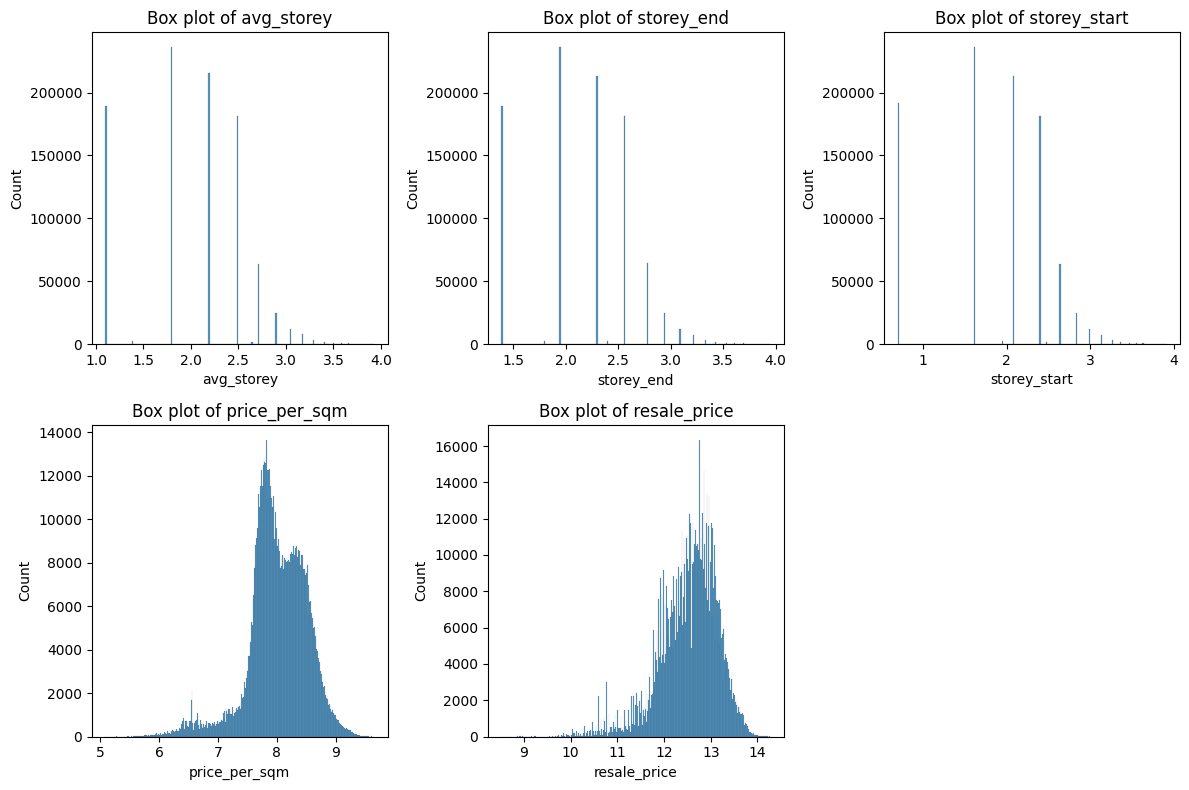

In [189]:
columns_to_plot = ['avg_storey', 'storey_end', 'storey_start', 'price_per_sqm', 'resale_price']
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  
    sns.histplot(x=df_main[col])
    plt.title(f'Box plot of {col}')
    
plt.tight_layout()  
plt.show()

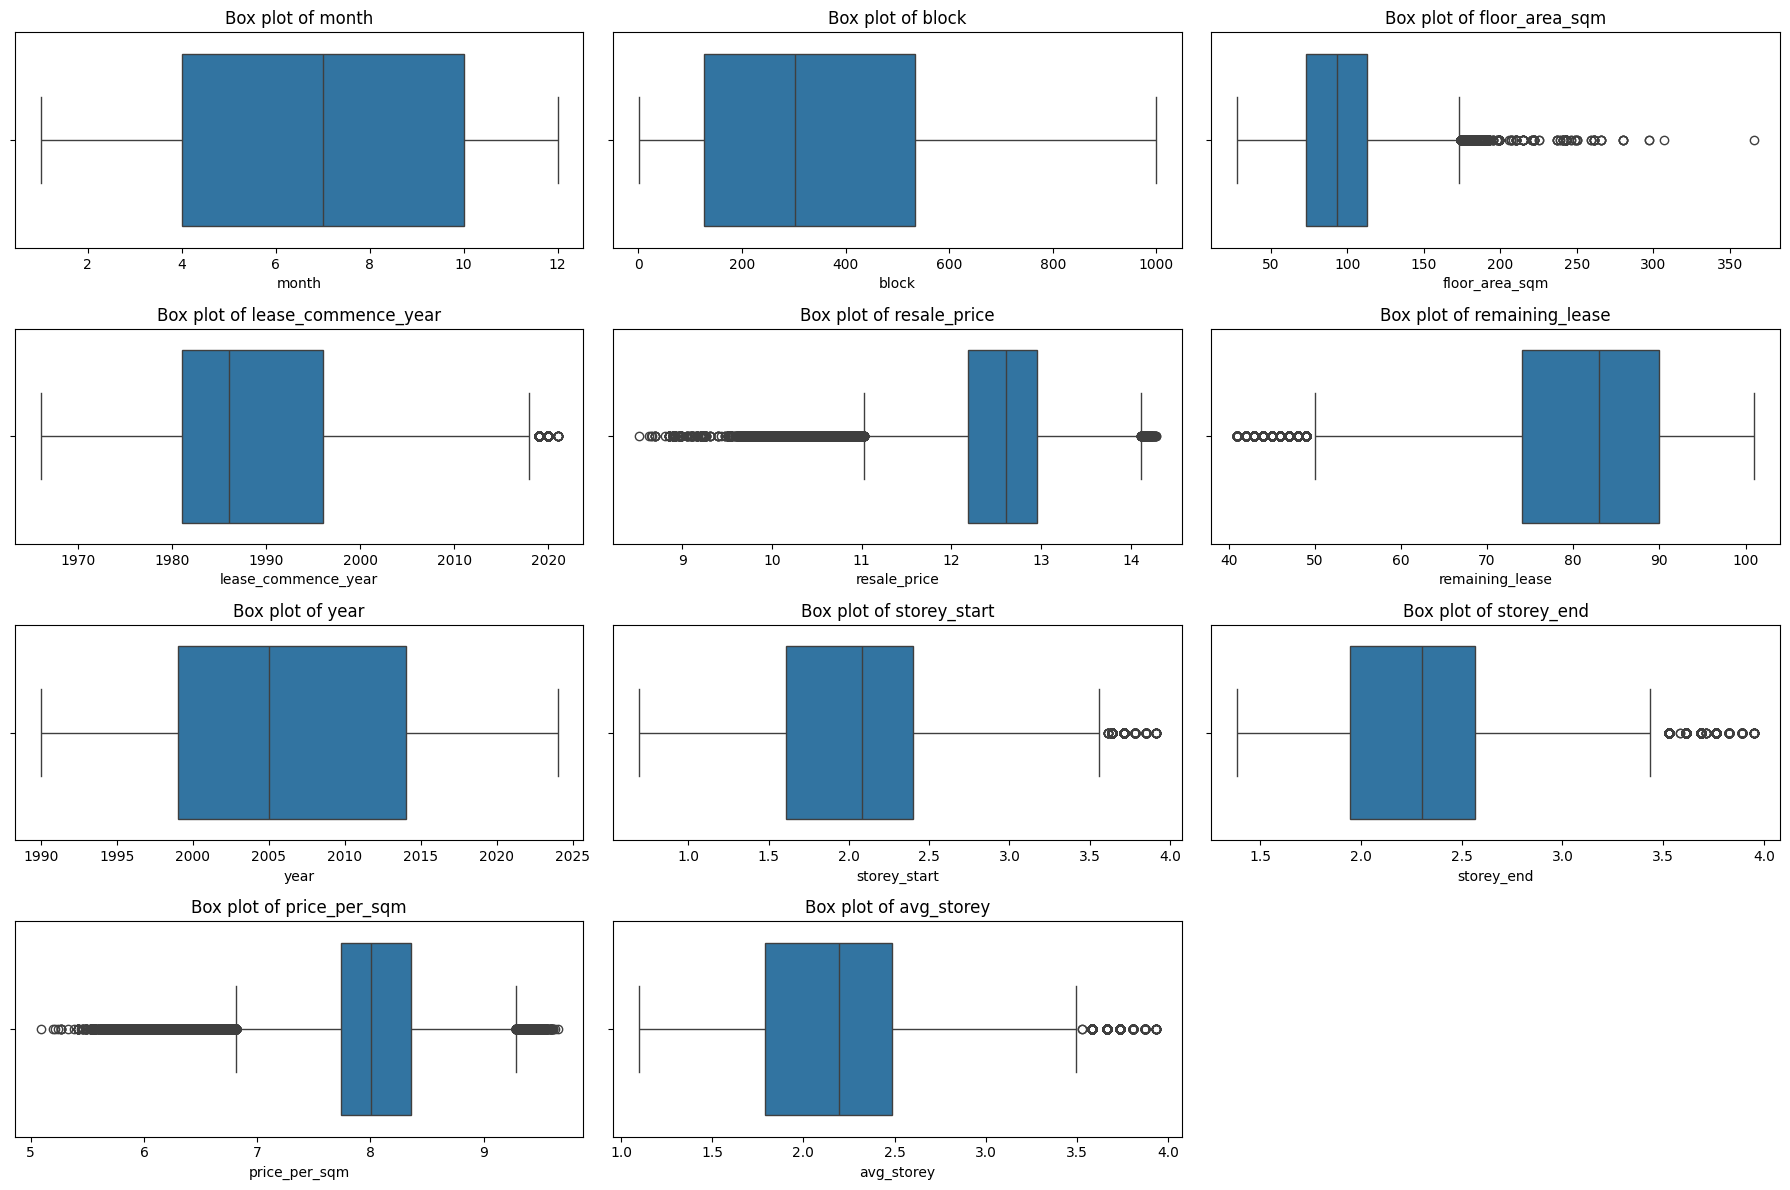

In [190]:
columns_to_plot = ['month', 'block', 'floor_area_sqm', 'lease_commence_year', 
                    'resale_price', 'remaining_lease', 'year', 'storey_start', 
                    'storey_end', 'price_per_sqm', 'avg_storey']

plt.figure(figsize=(18, 12))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 3, i)  
    sns.boxplot(x=df_main[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout() 
plt.show()

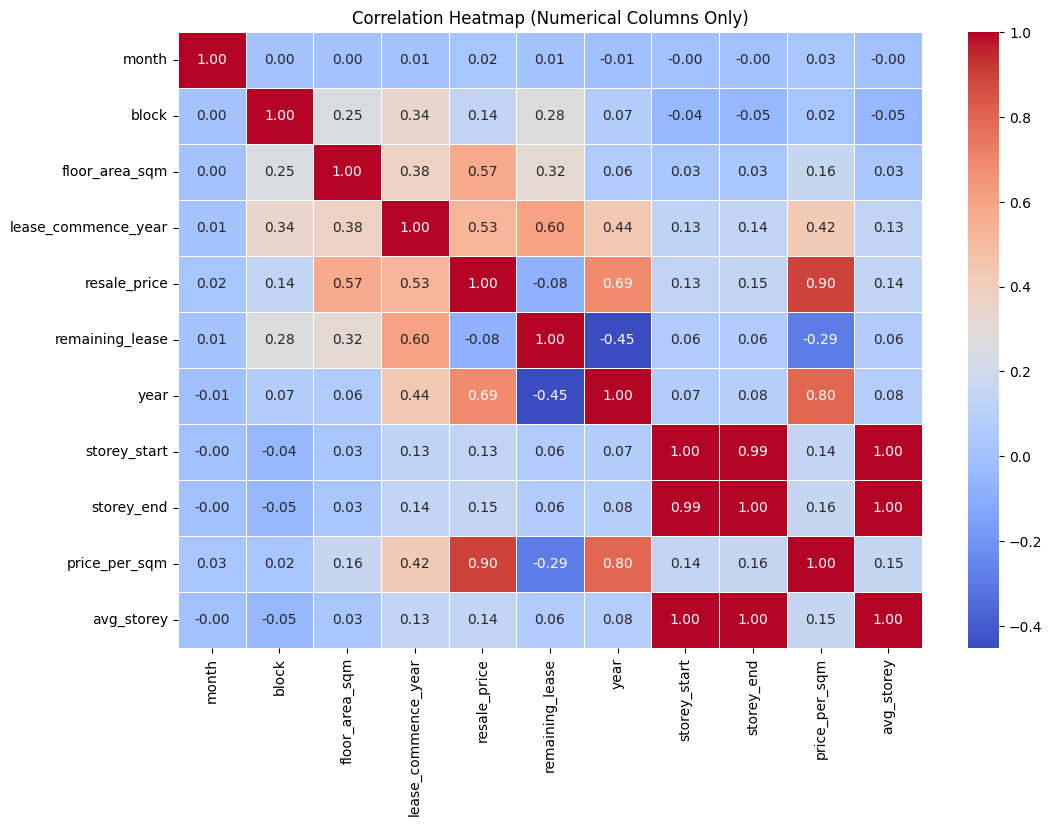

In [191]:
numerical_columns = df_main.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df_main[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Columns Only)')
plt.show()

In [192]:
df_main.drop(columns=['storey_end', 'avg_storey'],inplace=True)

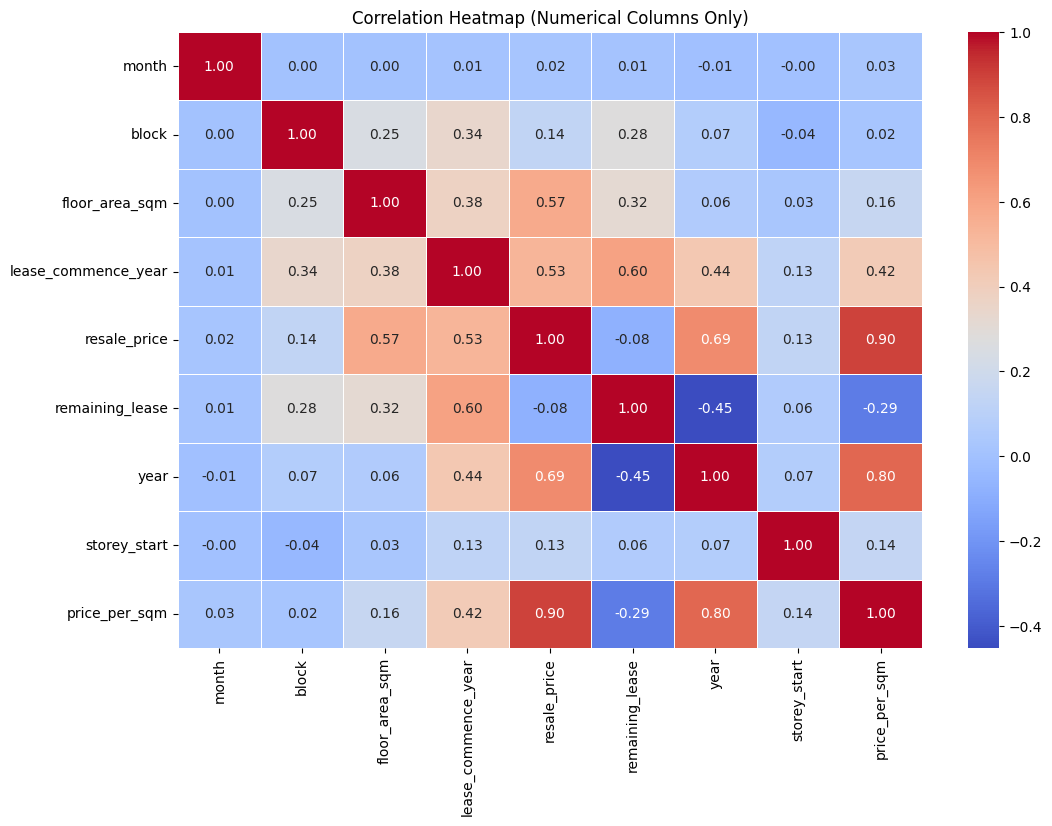

In [193]:
numerical_columns = df_main.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df_main[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Columns Only)')
plt.show()

Text(0.5, 1.0, 'Correlation of all features with target feature')

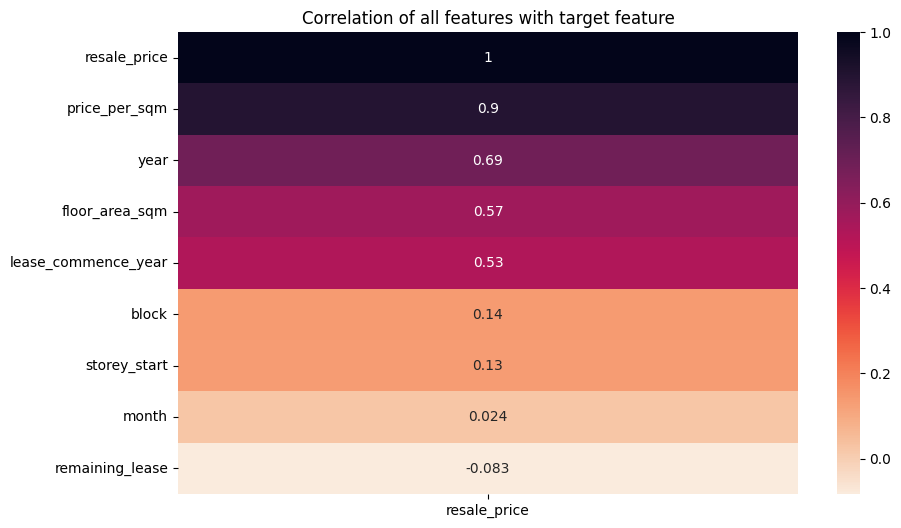

In [195]:
#correlation with heatmap

corr_plt=df_main[['month', 'block', 'floor_area_sqm','lease_commence_year', 'resale_price', 'remaining_lease',
                'year', 'storey_start', 'price_per_sqm']].corr()

target_corr=corr_plt['resale_price'].sort_values(ascending=False)



plt.figure(figsize=(10,6))
sns.heatmap(target_corr.to_frame(),annot=True, cmap='rocket_r')
plt.title('Correlation of all features with target feature')

In [196]:
df_main.columns

Index(['month', 'town', 'flat_type', 'block', 'floor_area_sqm', 'flat_model',
       'lease_commence_year', 'resale_price', 'remaining_lease', 'year',
       'storey_start', 'price_per_sqm'],
      dtype='object')

MODELING

In [197]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from scipy.stats import randint
from sklearn import metrics
import pickle

In [198]:
def encoding(df,columns):
    le=LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    unique_labels = le.classes_
    encoded_values = le.transform(unique_labels)

    for i,j in zip(unique_labels,encoded_values):
        print(i,':',j)


In [199]:
df_main['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [200]:
encoding(df_main,'town')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26


In [201]:
df_main['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [202]:
encoding(df_main,'flat_type')

1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI-GENERATION : 6


In [204]:
df_main['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI-GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [205]:
encoding(df_main,'flat_model')

2-ROOM : 0
3GEN : 1
ADJOINED FLAT : 2
APARTMENT : 3
DBSS : 4
IMPROVED : 5
IMPROVED-MAISONETTE : 6
MAISONETTE : 7
MODEL A : 8
MODEL A-MAISONETTE : 9
MODEL A2 : 10
MULTI-GENERATION : 11
NEW GENERATION : 12
PREMIUM APARTMENT : 13
PREMIUM APARTMENT LOFT : 14
PREMIUM MAISONETTE : 15
SIMPLIFIED : 16
STANDARD : 17
TERRACE : 18
TYPE S1 : 19
TYPE S2 : 20


In [123]:
df_main.head()

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_year,resale_price,remaining_lease,year,storey_start,price_per_sqm
0,1,0,0,309,31,5,1977,9.105091,86,1990,2.397895,5.673323
1,1,0,0,309,31,5,1977,8.699681,86,1990,1.386294,5.267858
2,1,0,0,309,31,5,1977,8.987322,86,1990,2.397895,5.556828
3,1,0,0,309,31,5,1977,8.699681,86,1990,1.945910,5.267858
4,1,0,2,216,73,12,1976,10.762149,85,1990,1.386294,6.472346


In [124]:
# function to choose the best algorithm

def best_ML_algorithm(df,algorithms):
        x=df.drop(columns=['resale_price'],axis=1)
        y=df['resale_price']

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12, shuffle=True)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results        

In [125]:
# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
            GradientBoostingRegressor, XGBRegressor]
best_algorithm, results = best_ML_algorithm(df_main, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                      0.028412            0.001873                 0.043283  0.995068
DecisionTreeRegressor                 0.000504            0.000013                 0.003655  0.999965
ExtraTreesRegressor                   0.000551            0.000014                 0.003712  0.999964
RandomForestRegressor                 0.000367            0.000007                 0.002681  0.999981
GradientBoostingRegressor             0.017344            0.000537                 0.023164  0.998587
XGBRegressor                          0.008038            0.000180                 0.013418  0.999526
**Best Algorithm:** RandomForestRegressor


In [129]:
# Random forest regressor
x=df_main.drop(columns=['resale_price'],axis=1)
y=df_main['resale_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12, shuffle=True)

model_regressor = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=12)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.0003675981110773506
Mean Squared Error: 6.989114669992679e-06
Root Mean Squared Error: 0.0026436933766972068
R-squared: 0.9999815996165844


In [130]:
#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns)
feature_scores

month                  0.000002
town                   0.000002
flat_type              0.007123
block                  0.000006
floor_area_sqm         0.176401
flat_model             0.000018
lease_commence_year    0.000011
remaining_lease        0.000013
year                   0.000016
storey_start           0.000001
price_per_sqm          0.816408
dtype: float64

In [131]:
# store the model using pickle

with open('Singapore_Regressor.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [132]:
df_main.head(2)

,month,town,flat_type,block,floor_area_sqm,flat_model,lease_commence_year,resale_price,remaining_lease,year,storey_start,price_per_sqm
0,1,0,0,309,31,5,1977,9.105091,86,1990,2.397895,5.673323
1,1,0,0,309,31,5,1977,8.699681,86,1990,1.386294,5.267858


In [150]:
np.exp(df_main['storey_start'].max())

np.float64(48.99999999999999)

In [134]:
#load the pickle and predict the selling price with regressor model

with open('Singapore_Regressor.pkl','rb') as files:
    model=pickle.load(files)

predict=model.predict(np.array([[1,0,0,309,31,5,1977,86,1990,2.39,5.67]]))
np.exp(predict[0])

d:\DATA SCIENCE\Data Science - GUVI\Capstone\Capstone 5 - Singapore Resale Flat Price Prediction\Singapore_Project\sing_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


np.float64(9046.838840480272)

In [135]:
# Desiciontree regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = DecisionTreeRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.0004899671227633862
Mean Squared Error: 1.4762994870463065e-05
Root Mean Squared Error: 0.003842264289512509
R-squared: 0.9999610380222826


In [136]:
# store the model using pickle

with open('Decisiontree.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [137]:
with open('Decisiontree.pkl','rb') as files:
    model=pickle.load(files)

predict=model.predict(np.array([[1,0,0,309,31,5,1977,86,1990,2.39,5.67]]))
np.exp(predict[0])

d:\DATA SCIENCE\Data Science - GUVI\Capstone\Capstone 5 - Singapore Resale Flat Price Prediction\Singapore_Project\sing_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


np.float64(9001.0)